In [36]:
using Plots; gr()
using DataFrames
using CSV

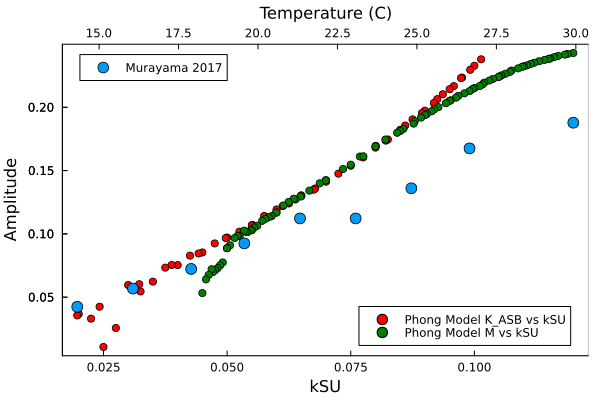

In [48]:
# Read the data
data = CSV.read("data/murayama_experimental_amp.csv", DataFrame)
data_2 = CSV.read("data/kSU_24.csv", DataFrame)
data_3 = CSV.read("data/M_kSU_24.csv", DataFrame)

# Create the base plot with the first dataset
p = plot(data_2[!,1], data_2[!,5], 
         label = "Phong Model K_ASB vs kSU", 
         ylabel = "Amplitude", 
         color = :red, 
         legend = :bottomright, 
         grid = :off, 
         xlabel = "kSU",
         seriestype = :scatter,
         fmt=:png)

# Add the second dataset on the same plot
scatter!(p, data_3[!,1], data_3[!,5], 
         label = "Phong Model M vs kSU", 
         marker = :circle, 
         color = :green)

# Define the twiny function
function twiny(sp::Plots.Subplot)
    sp[:top_margin] = max(sp[:top_margin], 30*Plots.px)
    plot!(sp.plt, inset = (sp[:subplot_index], bbox(0,0,1,1)))
    twinsp = sp.plt.subplots[end]
    twinsp[:xaxis][:mirror] = true
    twinsp[:background_color_inside] = RGBA{Float64}(0,0,0,0)
    Plots.link_axes!(sp[:yaxis], twinsp[:yaxis])
    twinsp
end
twiny(plt::Plots.Plot = current()) = twiny(plt[1])

# Create a secondary x-axis and plot additional data
p_top = twiny()

# Plot additional data on the secondary x-axis
plot!(p_top, data[!,1], data[!,2], 
      label = "Murayama 2017", 
      legend = :topleft,  
      grid = :off, 
      framestyle=:semi,
      xlabel = "Temperature (C)", 
      seriestype = :scatter,
      markersize=6)

# Display the plot
display(p)